<a href="https://colab.research.google.com/github/sebagit914/Challenge01/blob/master/Reproducir_inter%C3%A9s_vs_gr%C3%A1fico_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El conjunto de datos que se te da aquí es el conjunto de datos hipotecario usado anteriormente en este curso. Tu meta es reproducir un gráfico. El plot negro es la hipoteca de 30 años al 5% y la línea azul es al 3%. Lo que está graficado es el interés acumulado pagado en el transcurso del préstamo. Nota que no es un gráfico hermoso. No dice qué línea corresponde a qué hipoteca y el gráfico en sí no es visualmente el más atractivo. Estos son los tipos de problemas que se cubren a lo largo del curso. 

Usa Python para recrear este gráfico:

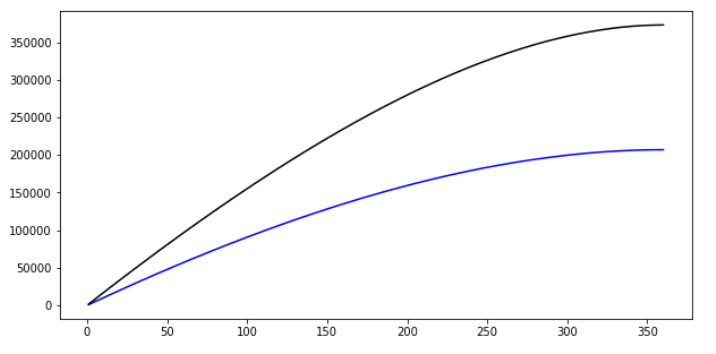

# 1 - Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


# 2 - Montar volumen Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename = '/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/mortage.csv'
df = pd.read_csv(filename)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [4]:
df.columns

Index(['Month', 'Starting Balance', 'Repayment', 'Interest Paid',
       'Principal Paid', 'New Balance', 'Mortgage Name', 'Interest Rate'],
      dtype='object')

In [5]:
df.shape

(1080, 8)

# 3 - Filtro al 3% y a 30 años

In [6]:
filtro_3 = df['Interest Rate'] == 0.03
filtro_30= df['Mortgage Name'] == '30 Year'
filtro_3_30 = df.loc[filtro_3 & filtro_30, : ]
filtro_3_30.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [7]:
filtro_3_30 = filtro_3_30[['Month', 'Interest Paid']]
filtro_3_30 = filtro_3_30.assign(acumulado = filtro_3_30['Interest Paid'].cumsum())
del filtro_3_30['Interest Paid']
filtro_3_30 

,Month,acumulado
0,1,1000.00
1,2,1998.28
2,3,2994.84
3,4,3989.67
4,5,4982.77
...,...,...
355,356,207064.13
356,357,207080.87
357,358,207093.44
358,359,207101.82


In [8]:
meses_30_3 = filtro_3_30.loc[ : ,'Month'].values
acumulado_30_3 = filtro_3_30.loc[ :, 'acumulado'].values

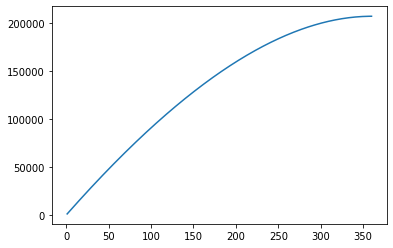

In [9]:
plt.plot(meses_30_3, acumulado_30_3) 

# 4 -Filtro al 5% y a 30 años

In [10]:
filtro_5 = df['Interest Rate'] == 0.05
filtro_5_30 = df.loc[filtro_5 & filtro_30, : ]
filtro_5_30.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


In [11]:
filtro_5_30 = filtro_5_30[['Month', 'Interest Paid']]
filtro_5_30 = filtro_5_30.assign(acumulado = filtro_5_30['Interest Paid'].cumsum())
del filtro_5_30['Interest Paid']
filtro_5_30 

,Month,acumulado
360,1,1666.66
361,2,3331.32
362,3,4993.97
363,4,6654.60
364,5,8313.20
...,...,...
715,356,372928.64
716,357,372964.02
717,358,372990.60
718,359,373008.35


In [12]:
meses_30_5 = filtro_5_30.loc[ : ,'Month'].values
acumulado_30_5 = filtro_5_30.loc[ :, 'acumulado'].values

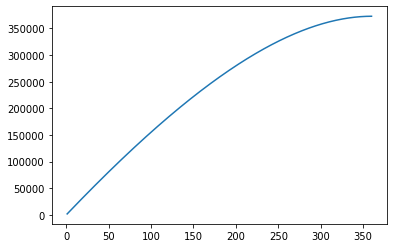

In [13]:
plt.plot(meses_30_5, acumulado_30_5) 

# 4 - Gráfico

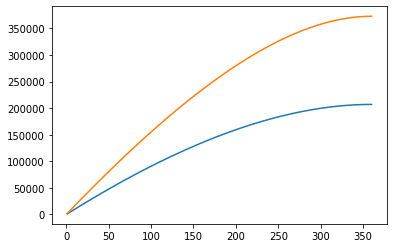

In [14]:
plt.plot(meses_30_3, acumulado_30_3) 
plt.plot(meses_30_5, acumulado_30_5) 